<a href="https://colab.research.google.com/github/sanjogmish/Ted-Talk-Views-Prediction/blob/main/Team_Notebook_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelling Notebook**

## **Objective**: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost
!pip install lightgbm

## Data preprocessing is done in a seperate notebook to avoid cluttering and overload.
## The same notebook carries a baseline model along with its model interpretation to see most contributing features

In [ ]:
folder_path = "/content/drive/MyDrive/Capstone 3 Regression/Final_data/"
X = pd.read_csv(folder_path+"X.csv").drop('Unnamed: 0',axis=1)
y = pd.read_csv(folder_path+"y.csv").drop('Unnamed: 0',axis=1)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.20, random_state= 5)

# Creating functions for getting metric scores later

In [ ]:
def adjusted_r2(true,pred):
    return 1 - (1-r2_score(true,pred)) * (len(y)-1)/(len(y)-X.shape[1]-1)

## Linear regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,lin_reg.predict(X_test)),2)}")

The r2 score for testing is 0.8


The base Linear Regression model is performing under average as it is a simple parametric model and doesn't works great if there are a lot of features

## Regularized Linear regression with Elasticnet

In [ ]:
elastic_param = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                }

In [ ]:
elastic_grid = GridSearchCV(estimator=ElasticNet(),
                       param_grid = elastic_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
elastic_grid.fit(X_train,y_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=9,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2', verbose=2)

In [ ]:
optimal_elastic = elastic_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_elastic.predict(X_test)),2)}")

The r2 score for testing is 0.84


Performance improved but not greatly after regularization.

## RandomForest 

In [ ]:
rf_reg = RandomForestRegressor(n_jobs=-1)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [ ]:
print(f"The r2 score for training is {round(r2_score(y_train,rf_reg.predict(X_train)),2)}")

The r2 score for training is 0.96


In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,rf_reg.predict(X_test)),2)}")

The r2 score for testing is 0.85


In [ ]:
rf_param = {
            'n_estimators':[100,250,500],
            'max_depth':[2,4,5,6],
            'max_leaf_nodes':[150]
           }

In [ ]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid = rf_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=9,
             param_grid={'max_depth': [2, 4, 5, 6], 'max_leaf_nodes': [150],
                         'n_estimators': [100, 250, 500]},
             scoring='r2', verbose=2)

In [ ]:
optimal_rf = rf_grid.best_estimator_

Different metric scores are summed up in the dataframe below:- 




Train        Test
R2                            0.930       0.854
Adjusted-R2                   0.921       0.836
Mean Absolute error         171.184     245.788
Mean square error        163333.296  411767.442
Root mean Squared error     404.145     641.691

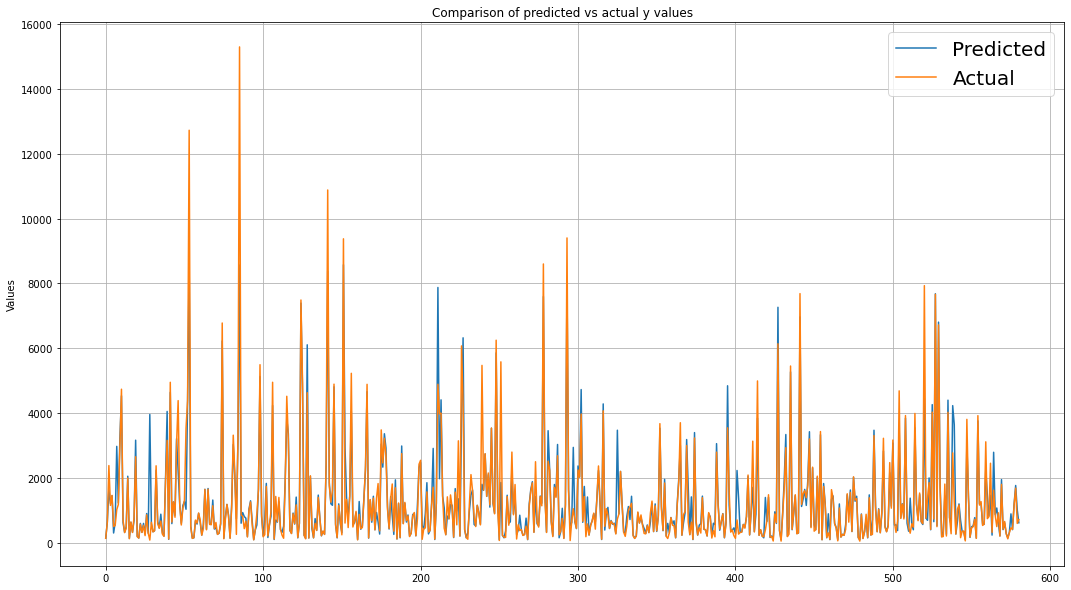

In [ ]:
get_metric(optimal_rf,True)

Random Forest regressor is overfitted. Possible as tree based models are prone to overfitting

## LGBM 

In [ ]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train,y_train)

LGBMRegressor()

In [ ]:
r2_score(y_train,lgbm_reg.predict(X_train))

0.967454294361459

In [ ]:
r2_score(y_test,lgbm_reg.predict(X_test))

0.8642526348201027

In [ ]:
lgbm_param = {
              "n_estimators" :[50,100,150],
              'num_leaves': [6,8,12,16],
              "max_depth": [2,4,5],
              "learning_rate": [0.01,0.05,0.1]
              }

In [ ]:
lgbm_grid = GridSearchCV(estimator=lgbm_reg,
                       param_grid = lgbm_param,n_jobs=6,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
lgbm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=6,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5], 'n_estimators': [50, 100, 150],
                         'num_leaves': [6, 8, 12, 16]},
             scoring='r2', verbose=2)

In [ ]:
lgbm_optimal = lgbm_grid.best_estimator_

Different metric scores are summed up in the dataframe below:- 




Train        Test
R2                            0.888       0.861
Adjusted-R2                   0.874       0.844
Mean Absolute error         221.824     263.523
Mean square error        260859.179  392336.897
Root mean Squared error     510.744     626.368

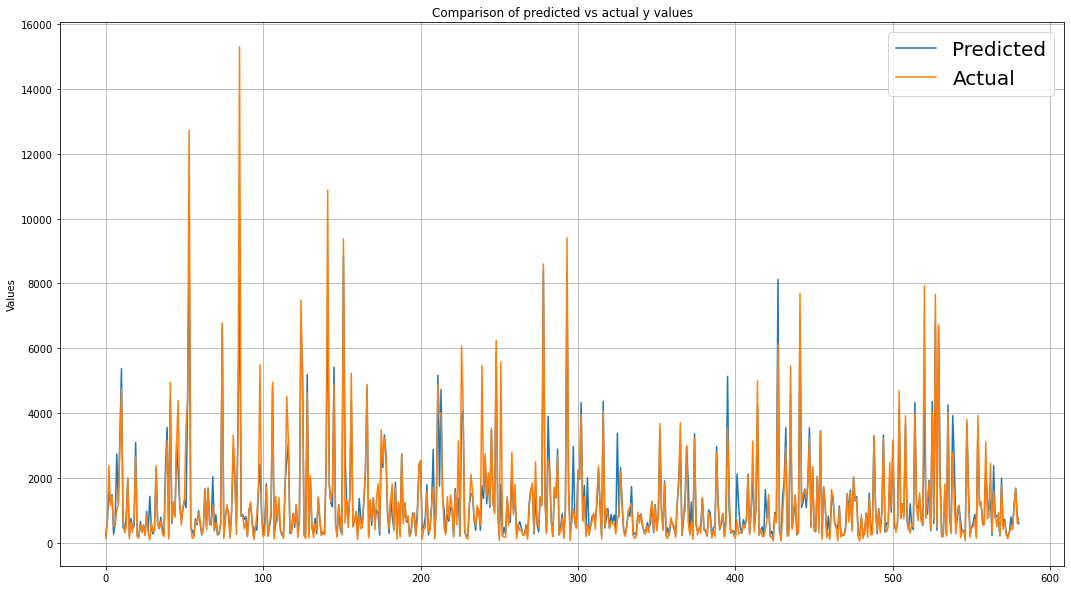

In [ ]:
get_metric(lgbm_optimal,True)

LGBM is performing great. The model is not overfitted and training and testing scores are very close to each other.

## CatBoost

In [ ]:
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train,y_train)

Learning rate set to 0.046778
0:	learn: 1482.0215338	total: 287ms	remaining: 4m 47s
1:	learn: 1438.5325879	total: 326ms	remaining: 2m 42s
2:	learn: 1400.4596667	total: 377ms	remaining: 2m 5s
3:	learn: 1359.8308607	total: 422ms	remaining: 1m 45s
4:	learn: 1323.5369911	total: 469ms	remaining: 1m 33s
5:	learn: 1290.6719591	total: 652ms	remaining: 1m 47s
6:	learn: 1263.2221479	total: 721ms	remaining: 1m 42s
7:	learn: 1234.6875494	total: 765ms	remaining: 1m 34s
8:	learn: 1205.8232731	total: 810ms	remaining: 1m 29s
9:	learn: 1176.9251834	total: 851ms	remaining: 1m 24s
10:	learn: 1149.3152296	total: 900ms	remaining: 1m 20s
11:	learn: 1127.1108161	total: 939ms	remaining: 1m 17s
12:	learn: 1101.9117693	total: 985ms	remaining: 1m 14s
13:	learn: 1076.5920401	total: 1.05s	remaining: 1m 13s
14:	learn: 1052.2057644	total: 1.13s	remaining: 1m 14s
15:	learn: 1028.3487375	total: 1.22s	remaining: 1m 15s
16:	learn: 1009.5640763	total: 1.29s	remaining: 1m 14s
17:	learn: 990.8372282	total: 1.34s	remaining:

In [ ]:
cat_param = {'depth': [2,4,5],
             'learning_rate' : [0.01,0.05,0.1],
             'iterations'    : [150,200]
            }

In [ ]:
ct_grid = GridSearchCV(estimator=cat_reg,
                       param_grid = cat_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
ct_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 1431.6401341	total: 56ms	remaining: 11.1s
1:	learn: 1351.8262439	total: 88ms	remaining: 8.71s
2:	learn: 1279.1819528	total: 115ms	remaining: 7.54s
3:	learn: 1221.4400254	total: 144ms	remaining: 7.06s
4:	learn: 1164.6436977	total: 172ms	remaining: 6.72s
5:	learn: 1110.5073409	total: 201ms	remaining: 6.48s
6:	learn: 1060.7580395	total: 235ms	remaining: 6.49s
7:	learn: 1012.5064920	total: 262ms	remaining: 6.28s
8:	learn: 974.8220248	total: 287ms	remaining: 6.08s
9:	learn: 934.4460771	total: 314ms	remaining: 5.96s
10:	learn: 892.5677304	total: 343ms	remaining: 5.89s
11:	learn: 861.9532939	total: 374ms	remaining: 5.86s
12:	learn: 833.7359712	total: 408ms	remaining: 5.86s
13:	learn: 813.4544588	total: 441ms	remaining: 5.86s
14:	learn: 791.4868891	total: 472ms	remaining: 5.82s
15:	learn: 767.4301866	total: 507ms	remaining: 5.83s
16:	learn: 748.8925856	total: 545ms	remaining: 5.86s
17:	learn: 733.3569731	total: 582ms	remain

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000022972DE97C0>,
             n_jobs=9,
             param_grid={'depth': [2, 4, 5], 'iterations': [150, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [ ]:
optimal_cat = ct_grid.best_estimator_

Different metric scores are summed up in the dataframe below:- 




Train        Test
R2                           0.969       0.866
Adjusted-R2                  0.965       0.849
Mean Absolute error        161.159     266.115
Mean square error        71908.778  377997.191
Root mean Squared error    268.158     614.815

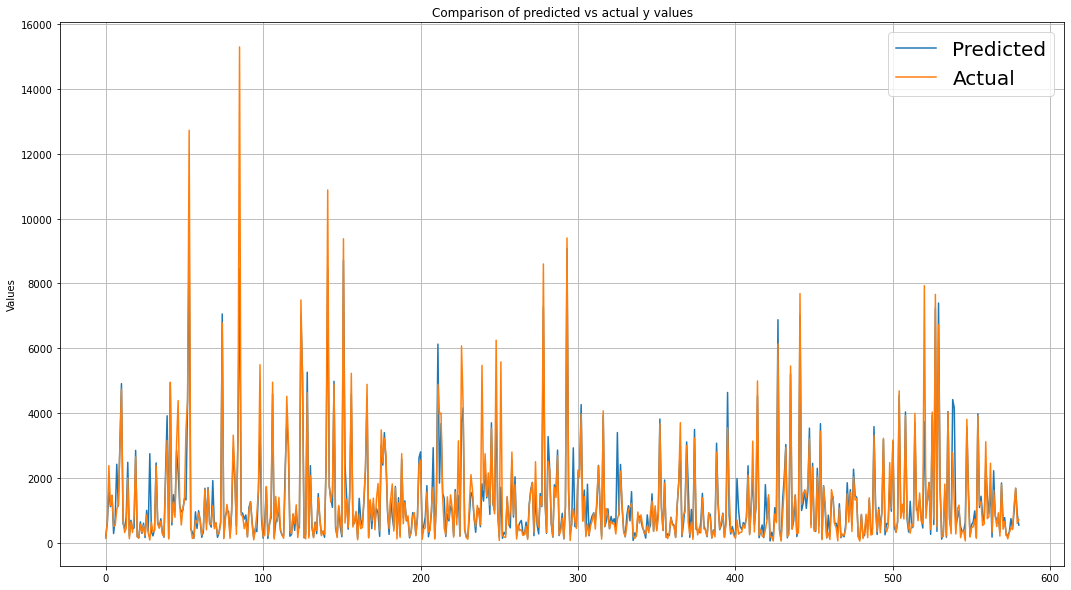

In [ ]:
get_metric(optimal_cat,True)

CatBoost is suffering from overfitting.

## XGBoost

In [ ]:
xgb_reg = XGBRegressor()

In [ ]:
xgb_reg.fit(X_train,y_train)

[17:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
r2_score(y_train,xgb_reg.predict(X_train))

0.999988060375447

In [ ]:
r2_score(y_test,xgb_reg.predict(X_test))

0.8657967308092374

In [ ]:
xgb_param = {'n_estimators': [50,100,150,200],
            'max_depth': [2,4,5,10],
            'learning_rate':[0.01,0.05,0.1]
            }

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb_reg,
                       param_grid = xgb_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=12,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', val

In [ ]:
optimal_xgb = xgb_grid.best_estimator_

In [ ]:
get_metric(optimal_xgb,True)

Different metric scores are summed up in the dataframe below:- 




Train        Test
R2                            0.919       0.838
Adjusted-R2                   0.908       0.817
Mean Absolute error         208.516     267.807
Mean square error        189423.016  458576.571
Root mean Squared error     435.228     677.183

We were able to improve the performance of XGBoost regressor after hyperparameter tuning. The overfitting is still present but to a lesser extent

## StackingRegressor

In [ ]:
stack_estimator = [('rf',optimal_rf),
                   ('lgbm',lgbm_optimal),
                   ('cat',optimal_cat),
                   ('xgb',optimal_xgb)
                  ]
stack_reg = StackingRegressor(estimators=stack_estimator,final_estimator=lgbm_optimal,cv=5,verbose=2,n_jobs=9)

In [ ]:
stack_reg.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=6,
                                                     max_leaf_nodes=150,
                                                     n_estimators=250)),
                              ('lgbm',
                               LGBMRegressor(learning_rate=0.05, max_depth=5,
                                             num_leaves=6)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x000002297377F6D0>),
                              ('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_...
                                            max_delta_step=0, max_depth=4,
                                     

In [ ]:
get_metric(stack_reg,True)

Different metric scores are summed up in the dataframe below:- 




Train        Test
R2                            0.893       0.862
Adjusted-R2                   0.880       0.844
Mean Absolute error         202.026     257.121
Mean square error        248350.496  391433.283
Root mean Squared error     498.348     625.646

Stacking regressor is also performing good.

## Voting Regressor

In [ ]:
vot_reg = VotingRegressor(estimators=stack_estimator,verbose=2,n_jobs=9)
vot_reg.fit(X_train,y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=6,
                                                   max_leaf_nodes=150,
                                                   n_estimators=250)),
                            ('lgbm',
                             LGBMRegressor(learning_rate=0.05, max_depth=5,
                                           num_leaves=6)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x000002297377F6D0>),
                            ('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=...
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
            

Different metric scores are summed up in the dataframe below:- 




Train        Test
R2                            0.937       0.863
Adjusted-R2                   0.929       0.845
Mean Absolute error         175.346     242.501
Mean square error        145651.178  387933.649
Root mean Squared error     381.643     622.843

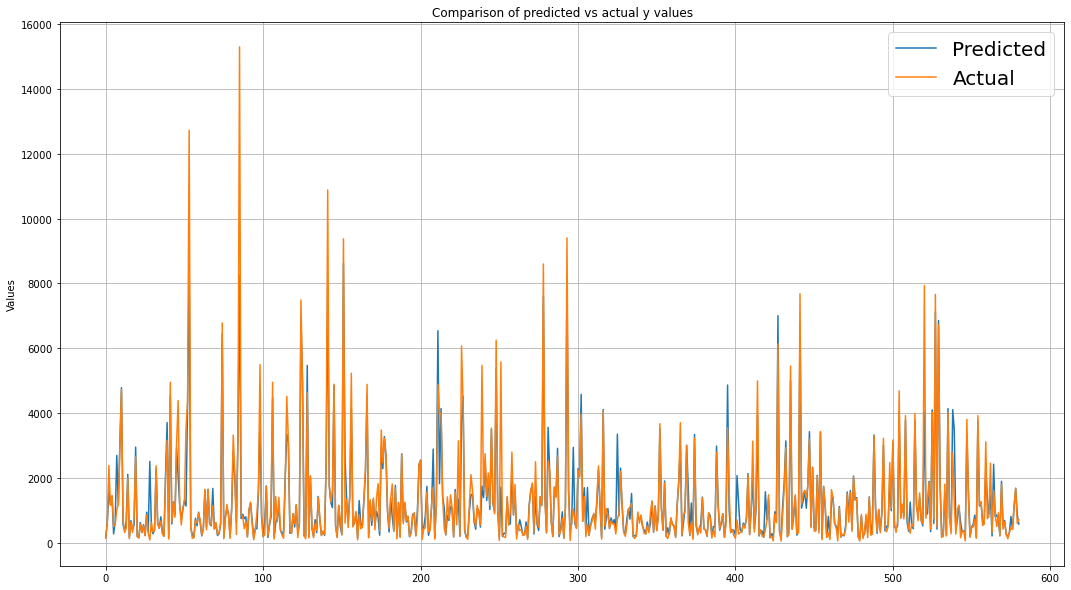

In [ ]:
get_metric(vot_reg,True)

Voting model is overfitted.

In [ ]:
regressors = [optimal_rf,lgbm_optimal,optimal_cat,optimal_xgb,stack_reg,vot_reg]
reg_names = ['RandomForest','LGBM','CatBoost','XGBoost','Stacking','Voting']
training,testing = [],[]
for i in regressors:
    tr = round(r2_score(y_train,i.predict(X_train)),3)
    ts = round(r2_score(y_test,i.predict(X_test)),3)
    training.append(tr)
    testing.append(ts)

In [ ]:
diff = np.array(training)-np.array(testing)
np.argmin(diff)

1

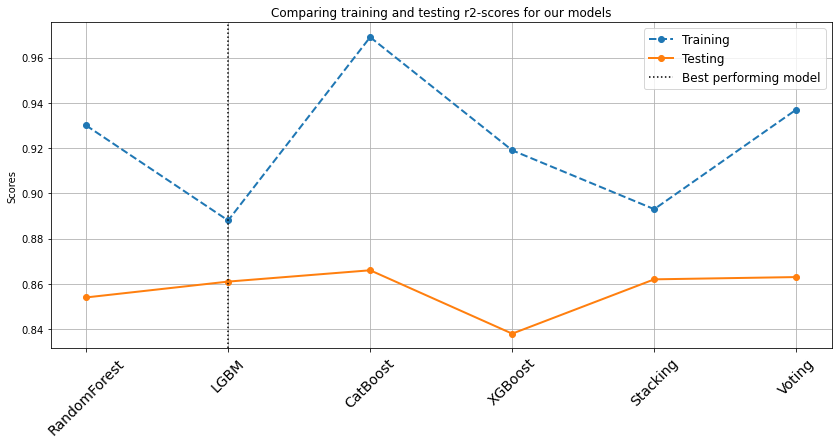

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(regressors)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(regressors)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(regressors)), reg_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing r2-scores for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

## Conclusion:

> After comparing the performances of various regression models, we can say that LGBM Regressor is the best performer. 

> It is free from overfitting and training and testing scores are close.

> CatBoost Regressor is the worst performing model. Even after hyperparameter tuning done twice on it, overfitting still persisted.

> Stacking Regressor was based on many estimators but the final_estimator argument was LGBM so it also performed extraordinarily.
